In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
%matplotlib inline

In [2]:
data=pd.read_csv('494dec4f-e508-489c-b679-6c12631f96e1_BTC_Data.csv',sep=',')

In [3]:
data.interpolate(axis=0,inplace=True)

In [4]:
interval3=(data['Date'] >= '2013/04/01') & (data['Date'] <= '2019/12/31')

In [5]:
df=data.loc[interval3]

In [6]:
df.head()

,Unnamed: 0,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
989,989,2013/04/01,94.715,52572,139256.0,48809,6695826.0,6.550211e+13,7220.0,127826531.0,...,99.456,96.992,95.075,93.774,91.450,9.383,36.980,104.747,185.993,606.456
990,990,2013/04/02,107.749,63095,175443.0,62276,6695826.0,6.184560e+13,7990.0,257306533.0,...,99.811,98.201,96.416,94.987,92.645,23.206,50.270,109.704,231.964,716.218
991,991,2013/04/03,120.003,63766,184209.0,69174,6695826.0,6.027037e+13,8852.0,252194497.0,...,99.902,98.752,97.190,95.785,93.508,34.759,51.448,107.789,259.795,808.284
992,992,2013/04/04,123.562,66738,221568.0,71753,6695826.0,5.527246e+13,8777.0,226470029.0,...,99.919,98.869,97.368,95.977,93.724,30.456,44.093,93.098,237.355,834.762
993,993,2013/04/05,128.664,61215,190067.0,69310,7005058.0,5.181545e+13,9950.0,227376421.0,...,99.941,99.022,97.602,96.233,94.013,19.411,48.589,95.718,229.992,876.762


In [7]:
X=df.iloc[:,2:]

In [8]:
X.head()

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
989,94.715,52572,139256.0,48809,6695826.0,6.550211e+13,7220.0,127826531.0,0.0777,0.0474,...,99.456,96.992,95.075,93.774,91.450,9.383,36.980,104.747,185.993,606.456
990,107.749,63095,175443.0,62276,6695826.0,6.184560e+13,7990.0,257306533.0,0.1050,0.0539,...,99.811,98.201,96.416,94.987,92.645,23.206,50.270,109.704,231.964,716.218
991,120.003,63766,184209.0,69174,6695826.0,6.027037e+13,8852.0,252194497.0,0.1330,0.0600,...,99.902,98.752,97.190,95.785,93.508,34.759,51.448,107.789,259.795,808.284
992,123.562,66738,221568.0,71753,6695826.0,5.527246e+13,8777.0,226470029.0,0.1410,0.0618,...,99.919,98.869,97.368,95.977,93.724,30.456,44.093,93.098,237.355,834.762
993,128.664,61215,190067.0,69310,7005058.0,5.181545e+13,9950.0,227376421.0,0.1200,0.0643,...,99.941,99.022,97.602,96.233,94.013,19.411,48.589,95.718,229.992,876.762


In [9]:
estimators=[]

In [10]:
estimators.append(['minmax',MinMaxScaler(feature_range=(-1,1))])

In [11]:
scale=Pipeline(estimators)

In [12]:
X=scale.fit_transform(X)

In [13]:
pca = PCA(n_components=6,random_state=7)
pca.fit(X)

PCA(n_components=6, random_state=7)

In [14]:
pca.explained_variance_ratio_

array([0.43630273, 0.12499583, 0.09213874, 0.04407213, 0.03042072,
       0.02542222])

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.43630273, 0.56129856, 0.6534373 , 0.69750943, 0.72793015,
       0.75335237])

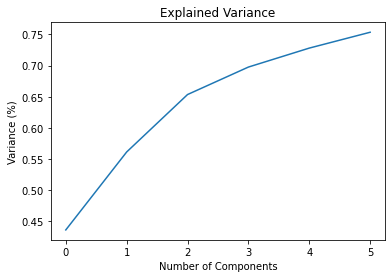

In [16]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [17]:
df_pca=pd.DataFrame(pca.components_).transpose()

In [18]:
df_pca.columns=['comp_1','comp_2','comp_3','comp_4','comp_5','comp_6']

In [19]:
y=df.iloc[:,1:2]

In [20]:
y.reset_index(drop=True,inplace=True)

In [21]:
df_pca['priceUSD']=y

In [22]:
df_pca.head()

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,priceUSD
0,0.058116,-0.016694,0.070860,0.005743,0.041563,0.004048,2013/04/01
1,0.073989,0.009038,-0.050076,0.041870,0.006122,-0.015159,2013/04/02
2,0.094911,0.062334,-0.086404,-0.016571,0.022675,-0.056049,2013/04/03
3,0.064889,0.023375,-0.041694,0.018898,0.027442,-0.016319,2013/04/04
4,0.065752,-0.117845,0.022383,0.035928,-0.001689,0.011374,2013/04/05


In [23]:
df_pca.to_csv('pca_75_reg.csv',index=False)

# Classification

In [24]:
one=data['priceUSD'].shift(-1,fill_value=1)

In [25]:
df['one']=one.loc[interval3]

<ipython-input-25-97e2f315f074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['one']=one.loc[interval3]


In [26]:
df['difference']=((df['one']-df['priceUSD'])/df['priceUSD'])*100

<ipython-input-26-95a65c7a4bec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['difference']=((df['one']-df['priceUSD'])/df['priceUSD'])*100


In [27]:
df.reset_index(drop=True,inplace=True)

In [28]:
category=[]
for x in range(len(df['difference'])):
    if df['difference'][x]>=0:
        category.append(1)
    else:
        category.append(0)

In [29]:
sum(category)

1332

In [30]:
df['category']=pd.DataFrame(category)

<ipython-input-30-e41b9fed2149>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category']=pd.DataFrame(category)


In [31]:
df.tail()

,Unnamed: 0,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,...,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,one,difference,category
2461,3450,2019/12/27,7263.0,322059,709273.0,415723,1.294859e+13,9.725392e+19,0.137,3.906419e+09,...,42.961,46.220,-1.348,0.717,0.076,-0.081,-11.109,7361.0,1.349305,1
2462,3451,2019/12/28,7361.0,298138,625161.0,376120,1.294859e+13,9.517417e+19,0.145,3.214321e+09,...,44.575,46.608,1.080,2.124,2.180,-2.562,-9.029,7469.0,1.467192,1
2463,3452,2019/12/29,7469.0,279770,552879.0,344377,1.294859e+13,1.010148e+20,0.144,2.491859e+09,...,46.295,47.031,2.631,2.658,4.788,-1.656,-7.569,7388.0,-1.084483,0
2464,3453,2019/12/30,7388.0,324331,661326.0,418908,1.294859e+13,1.018722e+20,0.152,4.650041e+09,...,45.205,46.750,1.722,-1.875,4.286,-3.716,-11.675,7293.0,-1.285869,0
2465,3454,2019/12/31,7293.0,293302,687065.0,375764,1.294859e+13,9.877266e+19,0.135,3.430133e+09,...,43.938,46.417,-0.935,-0.948,6.402,-0.922,-11.770,7238.0,-0.754148,0


In [32]:
df['priceUSD']=df['category']

<ipython-input-32-aff945fbe896>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['priceUSD']=df['category']


In [33]:
df.drop(columns=['category','one','difference'],inplace=True)

/Users/deepanshgandhi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
df.head(3)

,Unnamed: 0,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,989,2013/04/01,1,52572,139256.0,48809,6695826.0,6.550211e+13,7220.0,127826531.0,...,99.456,96.992,95.075,93.774,91.450,9.383,36.980,104.747,185.993,606.456
1,990,2013/04/02,1,63095,175443.0,62276,6695826.0,6.184560e+13,7990.0,257306533.0,...,99.811,98.201,96.416,94.987,92.645,23.206,50.270,109.704,231.964,716.218
2,991,2013/04/03,1,63766,184209.0,69174,6695826.0,6.027037e+13,8852.0,252194497.0,...,99.902,98.752,97.190,95.785,93.508,34.759,51.448,107.789,259.795,808.284


In [35]:
X=df.iloc[:,2:]

In [36]:
X.head()

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,1,52572,139256.0,48809,6695826.0,6.550211e+13,7220.0,127826531.0,0.0777,0.0474,...,99.456,96.992,95.075,93.774,91.450,9.383,36.980,104.747,185.993,606.456
1,1,63095,175443.0,62276,6695826.0,6.184560e+13,7990.0,257306533.0,0.1050,0.0539,...,99.811,98.201,96.416,94.987,92.645,23.206,50.270,109.704,231.964,716.218
2,1,63766,184209.0,69174,6695826.0,6.027037e+13,8852.0,252194497.0,0.1330,0.0600,...,99.902,98.752,97.190,95.785,93.508,34.759,51.448,107.789,259.795,808.284
3,1,66738,221568.0,71753,6695826.0,5.527246e+13,8777.0,226470029.0,0.1410,0.0618,...,99.919,98.869,97.368,95.977,93.724,30.456,44.093,93.098,237.355,834.762
4,1,61215,190067.0,69310,7005058.0,5.181545e+13,9950.0,227376421.0,0.1200,0.0643,...,99.941,99.022,97.602,96.233,94.013,19.411,48.589,95.718,229.992,876.762


In [37]:
estimators=[]

In [38]:
estimators.append(['minmax',MinMaxScaler(feature_range=(-1,1))])

In [39]:
scale=Pipeline(estimators)

In [40]:
X=scale.fit_transform(X)

In [41]:
pca = PCA(n_components=50,random_state=7)
pca.fit(X)

PCA(n_components=50, random_state=7)

In [42]:
pca.explained_variance_ratio_

array([0.42969228, 0.12359557, 0.09064055, 0.04361428, 0.03004435,
       0.02525898, 0.01847277, 0.01566585, 0.01558409, 0.01377162,
       0.01280891, 0.01169935, 0.01053912, 0.01003131, 0.00825134,
       0.00714565, 0.00697337, 0.00627245, 0.00567899, 0.00545957,
       0.00444157, 0.00433028, 0.00395461, 0.00369488, 0.00362328,
       0.0031674 , 0.00304598, 0.00295923, 0.00288328, 0.00269992,
       0.00260189, 0.00231051, 0.00229641, 0.00218691, 0.00196794,
       0.00186371, 0.00182893, 0.00173892, 0.00166641, 0.00160396,
       0.00154919, 0.00143255, 0.00140492, 0.00138316, 0.00130873,
       0.00125712, 0.00115603, 0.00107712, 0.00101314, 0.00097075])

In [43]:
np.cumsum(pca.explained_variance_ratio_)

array([0.42969228, 0.55328784, 0.64392839, 0.68754267, 0.71758702,
       0.742846  , 0.76131877, 0.77698462, 0.79256871, 0.80634033,
       0.81914924, 0.83084859, 0.84138771, 0.85141902, 0.85967036,
       0.86681601, 0.87378939, 0.88006183, 0.88574083, 0.8912004 ,
       0.89564197, 0.89997225, 0.90392686, 0.90762175, 0.91124503,
       0.91441243, 0.91745841, 0.92041764, 0.92330092, 0.92600084,
       0.92860273, 0.93091324, 0.93320965, 0.93539657, 0.9373645 ,
       0.93922821, 0.94105714, 0.94279606, 0.94446247, 0.94606643,
       0.94761562, 0.94904817, 0.9504531 , 0.95183626, 0.95314499,
       0.95440211, 0.95555814, 0.95663526, 0.9576484 , 0.95861914])

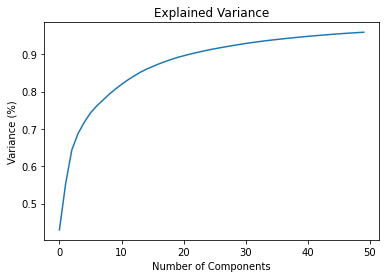

In [44]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [45]:
df_pca=pd.DataFrame(pca.components_).transpose()

In [47]:
y=df.iloc[:,1:2]

In [48]:
y.reset_index(drop=True,inplace=True)

In [49]:
df_pca['priceUSD']=y

In [50]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,priceUSD
0,-0.000453,0.031858,-0.025353,0.046557,-0.047065,-0.108655,-0.138888,0.294589,-0.119116,0.720788,...,-0.009600,0.017538,-0.001525,-0.005297,0.016080,-0.009969,-0.009536,-0.018498,0.015729,2013/04/01
1,0.074171,0.008900,-0.049871,0.041746,0.006259,-0.014658,0.002565,-0.013526,-0.043989,-0.023718,...,-0.005627,-0.002172,-0.031594,-0.015005,-0.004019,-0.014197,0.025744,-0.024140,0.012206,2013/04/02
2,0.095193,0.062041,-0.086169,-0.016918,0.022403,-0.054620,0.058363,-0.041482,0.015277,0.006979,...,0.028723,-0.007679,0.051816,0.059706,-0.013381,0.016500,-0.005264,-0.004222,0.013503,2013/04/03
3,0.065050,0.023236,-0.041538,0.018701,0.027465,-0.016234,-0.001668,-0.011407,-0.030464,-0.022885,...,-0.001863,0.010657,-0.012329,-0.012180,0.017880,-0.015558,0.002289,-0.003856,0.029197,2013/04/04
4,0.065794,-0.117846,0.022970,0.036187,-0.001153,0.011254,-0.001054,-0.008897,0.009599,0.000261,...,0.011975,0.004857,-0.002993,0.006000,0.002369,-0.013699,-0.005764,-0.004391,0.013442,2013/04/05


In [51]:
df_pca.to_csv('pca_75_clas.csv',index=False)